In [1]:
import pandas as pd
import numpy as np

# Reading the Dataset
covid_19 = pd.ExcelFile('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Project Datasets/covid-19-dashboard-02-29-24.xlsx')
#Create dataframes for each sheet

df_Week = pd.read_excel(covid_19, 'Weekly Cases and Deaths')
df_Demographics = pd.read_excel(covid_19, 'Case and Death Demographics')
df_county = pd.read_excel(covid_19, 'County Data')
df_city = pd.read_excel(covid_19, 'City and Town Data') 

In [12]:
#merge the dataframes
df1 = pd.merge(df_Week, df_Demographics, 
              on=['Week Start Date', 'Week End Date'],
              how = 'inner')
#display the merged dataframe
df1.head(10)

,Week Start Date,Week End Date,Confirmed deaths,Probable deaths,Confirmed and probable deaths,Confirmed cases,Probable cases,Confirmed and probable cases,Last updated_x,Season,...,Percent of the population,Cases during this week,Week case rate,Cumulative cases,Cumulative case rate,Deaths during this week,Week death rate,Cumulative deaths,Cumulative death rate,Last updated_y
0,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.12502909706909601,269,30.604901627893618,971.0,110.47345531853048,0,0,3,0.34131860551554222,2024-02-29
1,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.072560758667351705,47,9.2139498845747063,196.0,38.424131433545583,0,0,1,0.19604148690584483,2024-02-29
2,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.067842941109490296,124,25.999609239428533,377.0,79.047199058585136,0,0,0,0,2024-02-29
3,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.0014138687013020099,1-4,*,NaN,*,0,0,1-4,*,2024-02-29
4,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,**,64,*,205.0,*,0,*,4,*,2024-02-29
5,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.00026189764698934402,0,0,NaN,*,0,0,0,0,2024-02-29
6,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.68651113315199297,618,12.805327590390158,2419.0,50.123118836818435,2,0.041441189612913126,25,0.51801487016141412,2024-02-29
7,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,**,614,*,2019.0,*,0,*,0,*,2024-02-29
8,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.051478599999999999,1012,27.964296565714324,3608.0,99.698796451677154,1,0.027632704116318501,17,0.46975596997741459,2024-02-29
9,2023-07-30,2023-08-05,2,0,2,1234,505,1739,2024-02-29,2023-2024,...,0.048521399999999999,682,19.994038487408112,2453.0,71.914041656322709,1,0.029316771975671715,17,0.49838512358641912,2024-02-29


In [13]:
#Display the count of rows and columns
df1.shape

(680, 23)

In [14]:
#Display the column names
df1.columns

Index(['Week Start Date', 'Week End Date', 'Confirmed deaths',
       'Probable deaths', 'Confirmed and probable deaths', 'Confirmed cases',
       'Probable cases', 'Confirmed and probable cases', 'Last updated_x',
       'Season', 'Group', 'Subgroup', 'Estimated population',
       'Percent of the population', 'Cases during this week', 'Week case rate',
       'Cumulative cases', 'Cumulative case rate', 'Deaths during this week',
       'Week death rate', 'Cumulative deaths', 'Cumulative death rate',
       'Last updated_y'],
      dtype='object')

In [15]:
#Removing the columns which are not required
df1 = df1.drop(['Probable deaths', 'Confirmed and probable deaths', 'Probable cases', 'Confirmed and probable cases',
                'Last updated_x','Season','Last updated_y'], axis=1)
df1.head(10)

,Week Start Date,Week End Date,Confirmed deaths,Confirmed cases,Group,Subgroup,Estimated population,Percent of the population,Cases during this week,Week case rate,Cumulative cases,Cumulative case rate,Deaths during this week,Week death rate,Cumulative deaths,Cumulative death rate
0,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"Hispanic, all races",878944.17459859001,0.12502909706909601,269,30.604901627893618,971.0,110.47345531853048,0,0,3,0.34131860551554222
1,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"Asian, not Hispanic",510096.11066676001,0.072560758667351705,47,9.2139498845747063,196.0,38.424131433545583,0,0,1,0.19604148690584483
2,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"Black or African-American, not Hispanic",476930.24482826999,0.067842941109490296,124,25.999609239428533,377.0,79.047199058585136,0,0,0,0
3,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"Alaskan Native or American Indian, not Hispanic",9939.37961473,0.0014138687013020099,1-4,*,NaN,*,0,0,1-4,*
4,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"Other race, not Hispanic",**,**,64,*,205.0,*,0,*,4,*
5,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"Native Hawaiian or Pacific Islander, not Hispanic",1841.1187200300001,0.00026189764698934402,0,0,NaN,*,0,0,0,0
6,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,"White, not Hispanic",4826116.28353641,0.68651113315199297,618,12.805327590390158,2419.0,50.123118836818435,2,0.041441189612913126,25,0.51801487016141412
7,2023-07-30,2023-08-05,2,1234,Race and Hispanic ethnicity,Unknown race,**,**,614,*,2019.0,*,0,*,0,*
8,2023-07-30,2023-08-05,2,1234,Reported sex or gender,Female,3618900.25598128,0.051478599999999999,1012,27.964296565714324,3608.0,99.698796451677154,1,0.027632704116318501,17,0.46975596997741459
9,2023-07-30,2023-08-05,2,1234,Reported sex or gender,Male,3411016.7409626199,0.048521399999999999,682,19.994038487408112,2453.0,71.914041656322709,1,0.029316771975671715,17,0.49838512358641912


In [16]:
df1.shape

(680, 16)

In [17]:
#Checking for null values
df1.isnull().sum()


Week Start Date               0
Week End Date                 0
Confirmed deaths              0
Confirmed cases               0
Group                         0
Subgroup                      0
Estimated population          0
Percent of the population     0
Cases during this week        0
Week case rate                0
Cumulative cases             40
Cumulative case rate          0
Deaths during this week       0
Week death rate               0
Cumulative deaths             0
Cumulative death rate         0
dtype: int64

In [18]:
#Impute the missing values with total cases during the week in null values in Cumulative cases
df1['Cumulative cases'].fillna(df1['Cases during this week'], inplace=True)


/var/folders/0n/4y67mytn7gx0m219_th1k1jw0000gn/T/ipykernel_6491/2918734895.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1-4' '0' '0' '1-4' '1-4' '0' '0' '0' '0' '0' '1-4' '0' '0' '0' '0' '0'
 '1-4' '1-4' '0' '0' '0' '0' '0' '1-4' '0' '0' '0' '0' '0' '0' '1-4' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1['Cumulative cases'].fillna(df1['Cases during this week'], inplace=True)


In [19]:
#Checking for duplicate values
df1.duplicated().sum()


0

In [32]:
# Load the data into a DataFrame (assuming df is your DataFrame)
# Replace 'data.csv' with the actual path to your data file

# Convert Week Start Date and Week End Date to datetime objects
df1['Week Start Date'] = pd.to_datetime(df1['Week Start Date'])
df1['Week End Date'] = pd.to_datetime(df1['Week End Date'])

# Extract month from Week Start Date
df1['Month'] = df1['Week Start Date'].dt.to_period('M')

# Group the data by month and calculate summary statistics
monthly_summary = df1.groupby('Month').agg({
    'Confirmed deaths': ['sum', 'mean', 'median', 'std'],
    'Confirmed cases': ['sum', 'mean', 'median', 'std']
}).reset_index()

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Monthly COVID-19 Deaths and Cases Summary', level=1)

# Add a table to hold the summary statistics
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'

# Set column widths
table.columns[0].width = Inches(2)
table.columns[1].width = Inches(2)
table.columns[2].width = Inches(2)

# Add column headers to the table
headers = ['Month', 'Total Deaths', 'Total Cases']
for i, header in enumerate(headers):
    table.cell(0, i).text = header
    table.cell(0, i).paragraphs[0].runs[0].font.bold = True

# Add data from DataFrame to the table
for i in range(monthly_summary.shape[0]):
    row = table.add_row().cells
    row[0].text = str(monthly_summary.loc[i, 'Month'])
    row[1].text = str(monthly_summary.loc[i, 'Confirmed deaths'])
    row[2].text = str(monthly_summary.loc[i, 'Confirmed cases'])

# Adjust font size
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(10)

# Save the document
doc.save('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Module 1/monthly_summary.docx')


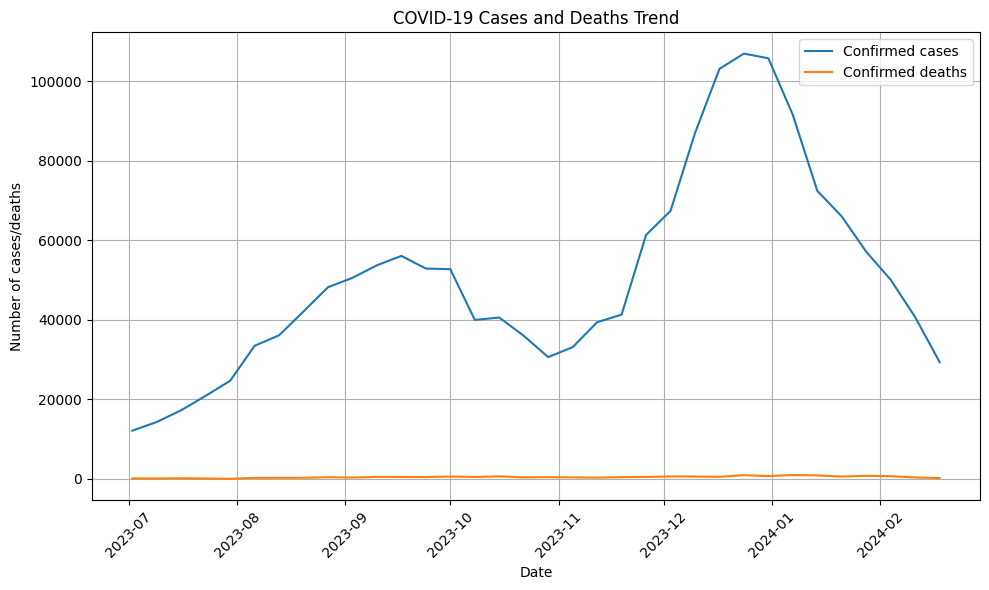

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Week Start Date to datetime object
df1['Week Start Date'] = pd.to_datetime(df1['Week Start Date'])

# Group the data by Week Start Date and calculate total cases and deaths
trend_data = df1.groupby('Week Start Date').agg({
    'Confirmed cases': 'sum',
    'Confirmed deaths': 'sum'
}).reset_index()

# Plot the trend visualization
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Week Start Date'], trend_data['Confirmed cases'], label='Confirmed cases')
plt.plot(trend_data['Week Start Date'], trend_data['Confirmed deaths'], label='Confirmed deaths')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of cases/deaths')
plt.title('COVID-19 Cases and Deaths Trend')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
